<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/RNN(%EC%8B%9C%EA%B3%84%EC%97%B4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1000, 1)
[[1.        ]
 [1.1936735 ]
 [1.36948492]
 [1.51997896]
 [1.63841708]]


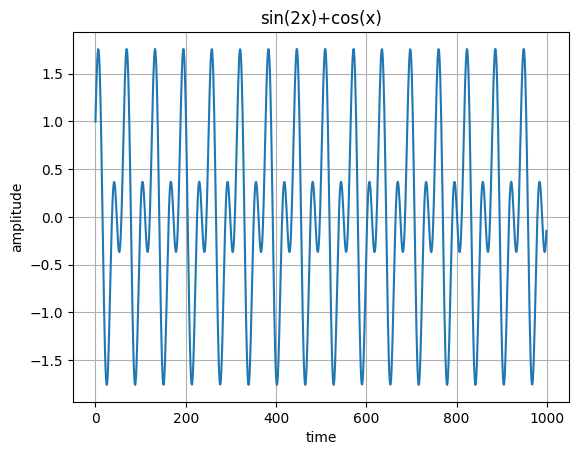

(980, 20, 1) (980, 1)
(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16769 (65.50 KB)
Trainable params: 16769 (65.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Train on 784 samples, validate on 196 samples


TypeError: Cannot interpret feed_dict key as Tensor: Tensor Tensor("Placeholder:0", shape=(), dtype=float32) is not an element of this graph.

In [77]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras import Sequential

# data 생성

x = np.arange(0, 100, 0.1)
y = np.sin(2*x) + np.cos(x)

seq_data = y.reshape(-1,1)

print(seq_data.shape)
print(seq_data[:5])

plt.grid()
plt.title('sin(2x)+cos(x)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

def seq2dataset(seq, window, horizon):

    X = []
    Y = []

    for i in range(len(seq)-(window+horizon)+1):

        x = seq[i:(i+window)]
        y = (seq[i+window+horizon-1])

        X.append(x)
        Y.append(y)

    return np.array(X), np.array(Y)

w = 20  # window size
h = 1  # horizon factor

X, Y = seq2dataset(seq_data, w, h)

print(X.shape, Y.shape)


split_ratio = 0.8

split = int(split_ratio*len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

tf.keras.backend.clear_session()
model = Sequential()
#model.add(SimpleRNN(units=128, activation='tanh',input_shape=x_train[0].shape))

model.add(SimpleRNN(units=128, activation='tanh',input_shape=(20,1)))

model.add(Dense(1))

model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

#--------------------------------------------------
from datetime import datetime
start_time = datetime.now()

hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

end_time = datetime.now()
print('Elapsed Time => ', end_time-start_time)
#--------------------------------------------------

